In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopy.distance
import os
import plotly.graph_objects as go
from shapely.geometry import shape, Point
import seaborn as sns
import matplotlib as mpl
import folium
import re
import seaborn as sns

In [32]:
df = pd.read_csv('Session-Details-Summary-20231129.csv') 

# Customer analysis

In [33]:
def convert_duration_to_seconds(duration):
    if isinstance(duration, str):
        parts = duration.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = int(parts[2].split()[0])  # Extract seconds and ignore 'AM' or 'PM'
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return total_seconds
    elif isinstance(duration, datetime.time):
        return duration.hour * 3600 + duration.minute * 60 + duration.second
    else:
        return 0  # Handle other cases if needed

# Assuming 'Total Duration' is in string format '1:26:32 AM'
df['Total Duration'] = df['Total Duration'].apply(convert_duration_to_seconds)
 


In [34]:
# Group data by User ID
user_analysis = df.groupby('User ID')

User ID with Maximum Frequency: 35312191
Maximum Frequency: 286
User ID with Maximum Duration: 2839.2694444444446


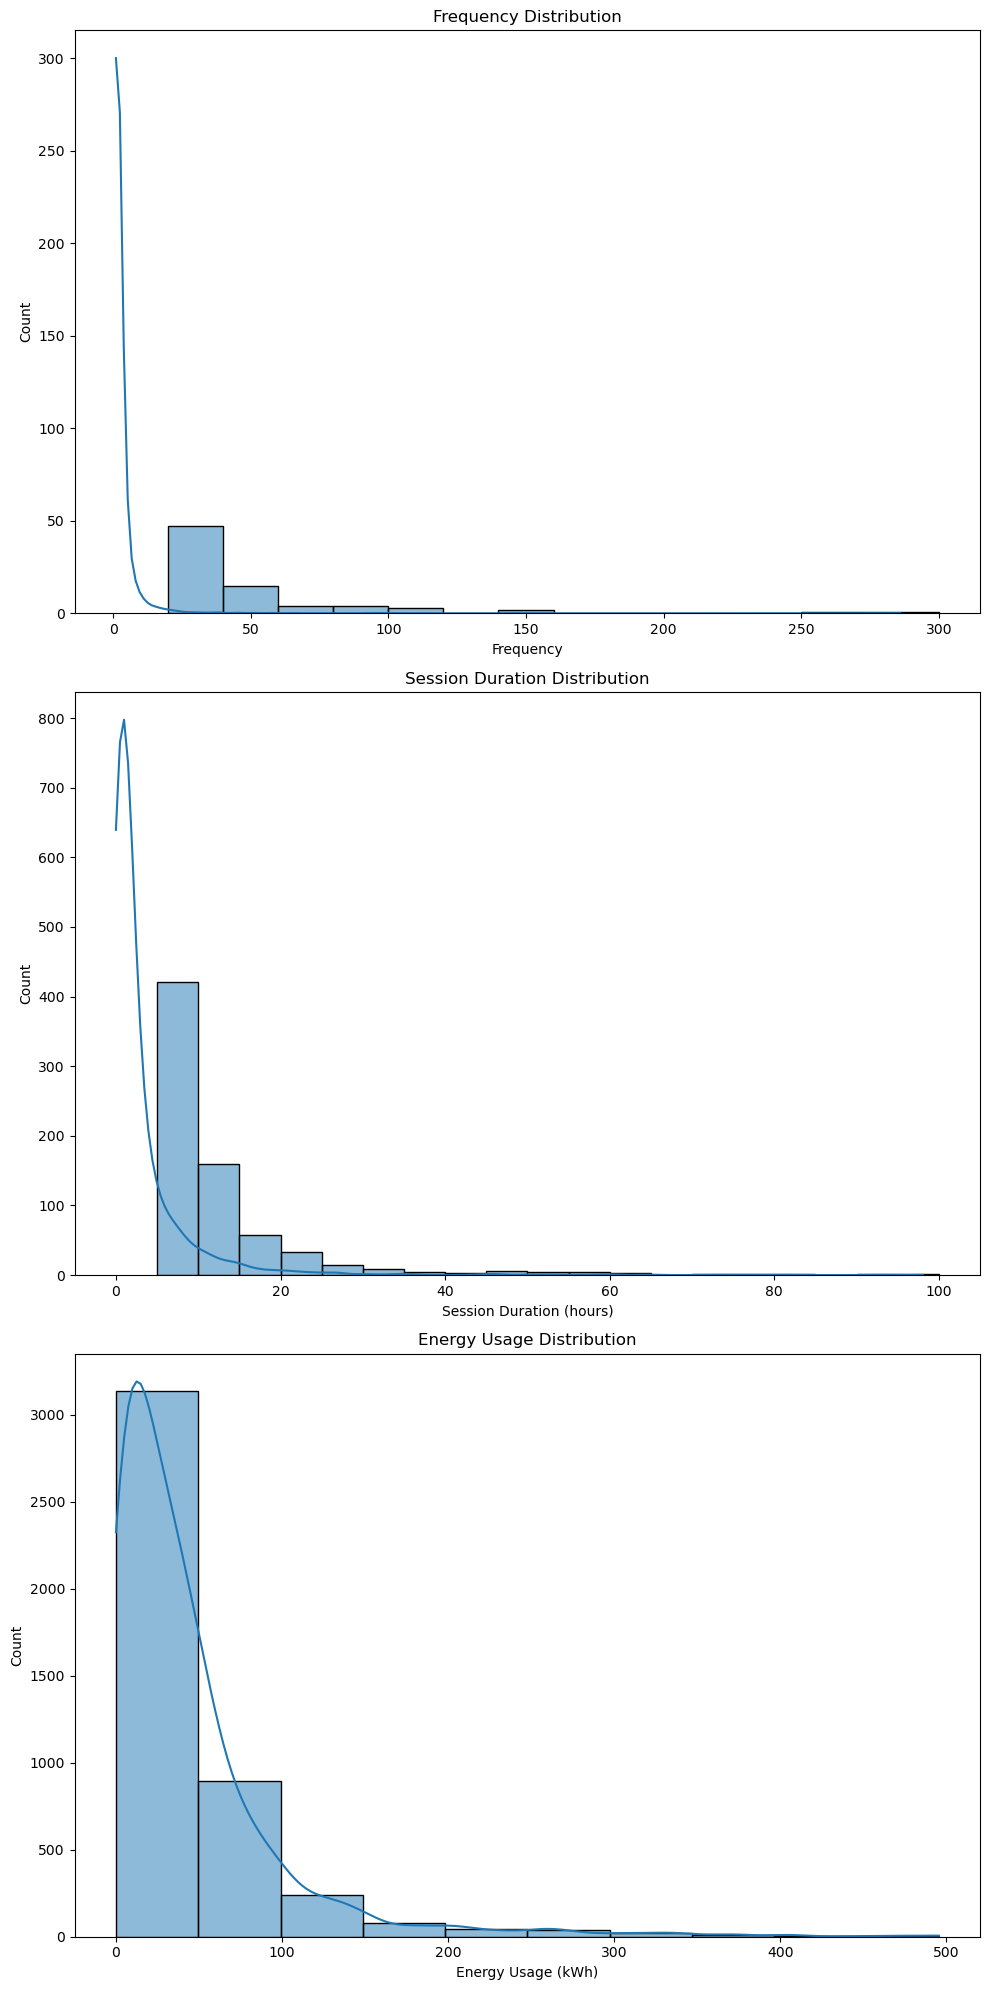

In [65]:
# Analyze frequency, session duration, and energy usage distributions
user_frequency = user_analysis.size()
user_session_duration = user_analysis['Total Duration'].sum()
user_energy_usage = user_analysis['Energy (kWh)'].sum()

# Find the customer with the maximum 
max_user_index = user_analysis.size().idxmax()
max_user_frequency = user_analysis.size().max()
max_user_Duration = user_session_duration.max()

print("User ID with Maximum Frequency:", max_user_index)
print("Maximum Frequency:", max_user_frequency)
print("User ID with Maximum Duration:", max_user_Duration/3600)

# Create a new DataFrame for analysis results
customer_analysis = pd.DataFrame({
    'Frequency': user_frequency,
    'Session Duration (hours)': user_session_duration / 3600,  # Convert seconds to hours
    'Energy Usage (kWh)': user_energy_usage
})

# Profile high-usage customers 
high_usage_threshold = 10 #  consider users with total energy usage over 10 kWh as high-usage
high_usage_customers = customer_analysis[customer_analysis['Energy Usage (kWh)'] > high_usage_threshold]

# Plot Frequency Distribution
plt.figure(figsize=(10, 20))

# Subplot for Frequency Distribution
plt.subplot(3, 1, 1)
sns.histplot(customer_analysis['Frequency'], bins=[20,40,60,80,100, 120, 140,160,180,200, 250, 300], kde=True)
plt.title('Frequency Distribution')

# Subplot for Session Duration Distribution
filtered_users = customer_analysis[customer_analysis['Session Duration (hours)'] < 100]
plt.subplot(3, 1, 2)
sns.histplot(filtered_users['Session Duration (hours)'], bins=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], kde=True)
plt.title('Session Duration Distribution')

# Subplot for Energy Usage Distribution
filtered_users_energy_usage = customer_analysis[customer_analysis['Energy Usage (kWh)'] < 500]
plt.subplot(3, 1, 3)
sns.histplot(filtered_users_energy_usage['Energy Usage (kWh)'], bins=10, kde=True)
plt.title('Energy Usage Distribution')

plt.tight_layout()
plt.show()

